<a href="https://colab.research.google.com/github/nguyenhuuhoang3697/Logistic-Regression-from-scratch/blob/main/Run_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Building Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
run '/content/drive/MyDrive/Môn tối ưu hóa/Thuyết trình lần 2/main.py'

In [ ]:
run main.py

Columns with outliers: ['LaivayDukien', 'TongChiphi', 'TongThu-TongChi', 'LuongPhucap', 'TongThunhap', 'SoduTienguiKyhan', 'SoduTienguiTT', 'SoluongSPvay', 'SLTCTD', 'ThoigianQHTD_nam', 'SoNguoiPhuthuoc', 'Tuoi', 'ThoigianCongtac_thang', 'SotienVay', 'ThoigianVay']


In [5]:
# Logistic Regression using Gradient Descent with Loss Tracking
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m
            self.coef_ += self.learning_rate * gradient

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [3]:
# Logistic Regression using Gradient Descent with L1
class LogisticRegressionGDL1:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, lambda_=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.lambda_ = lambda_

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + self.lambda_ * np.sum(np.abs(self.theta))
        return loss

    def gradient(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m + self.lambda_ * np.sign(self.theta)
        return gradient

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for iteration in range(self.max_iter):
            gradient = self.gradient(X, y)
            new_theta = self.theta - self.learning_rate * gradient
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)
            self.theta = new_theta


            if np.linalg.norm(self.learning_rate * gradient, ord=1) < self.tol:

                break

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [4]:
# Logistic Regression using Gradient Descent with L2
class LogisticRegressionGDL2:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, lambda_=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.lambda_ = lambda_

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + 0.5 * self.lambda_ * np.sum(self.theta ** 2)
        return loss

    def gradient(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m + self.lambda_ * self.theta
        return gradient

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for iteration in range(self.max_iter):
            gradient = self.gradient(X, y)
            new_theta = self.theta - self.learning_rate * gradient

            if np.linalg.norm(self.theta - new_theta, ord=1) < self.tol:
                break

            self.theta = new_theta
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            if np.linalg.norm(self.learning_rate * gradient, ord=1) < self.tol:
                break

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [ ]:
# Logistic Regression using Gradient Descent with Back Tracking
class LogisticRegressionGDbacktracking:
    def __init__(self, initial_learningrate = 1, alpha=0.3, beta=0.8, max_iter=1000, tol=1e-6):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.tol = tol
        self.initial_learningrate = initial_learningrate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y, theta=None):
        epsilon = 1e-10  # Một giá trị nhỏ
        if theta is None:
            theta = self.theta
        m = len(y)
        z = np.dot(X, theta)
        h = self.sigmoid(z)
        h = np.clip(h, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return loss

    def gradient(self, X, y):
        m = len(y)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        return gradient

    def backtracking_line_search(self, X, y, gradient):
        t = self.initial_learningrate
        while self.compute_loss(X, y) - self.compute_loss(X, y, self.theta - t * gradient) < self.alpha * t * np.dot(gradient.T, gradient):
            t *= self.beta
        return t

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for iteration in range(self.max_iter):
            gradient = self.gradient(X, y)
            learning_rate = self.backtracking_line_search(X, y, gradient)
            new_theta = self.theta - learning_rate * gradient

            if np.linalg.norm(self.theta - new_theta, ord=1) < self.tol:
                break

            self.theta = new_theta
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [ ]:
# Logistic Regression using Gradient Descent with Nesterov Accelerated Gradient Descent (NAGD)
class LogisticRegressionNAGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, momentum=0.9):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.momentum = momentum

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def gradient(self, X, y, theta):
        predictions = self.sigmoid(np.dot(X, theta))
        error = y - predictions
        gradient = -np.dot(X.T, error) / len(y)
        return gradient

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.velocity = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            # Compute the lookahead step
            theta_lookahead = self.coef_ + self.momentum * self.velocity

            # Compute gradient at the lookahead position
            gradient = self.gradient(X, y, theta_lookahead)

            # Update the velocity and coefficients
            self.velocity = self.momentum * self.velocity - self.learning_rate * gradient
            self.coef_ = self.coef_ + self.velocity

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with Fixed Step Size
class LogisticRegressionSGD_fixed_step:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(self.max_iter):
            indices = np.random.permutation(m)
            for idx in indices:
                xi = X[idx:idx+1]
                yi = y[idx:idx+1]
                prediction = self.sigmoid(np.dot(xi, self.coef_))
                error = yi - prediction
                gradient = -xi.T * error

                # Update coefficients using fixed learning rate
                self.coef_ = self.coef_ - self.learning_rate * gradient.flatten()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with Fixed Step Size and Batch Size
class LogisticRegressionSGD_batch_size:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, batch_size=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(self.max_iter):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Update coefficients using fixed learning rate
                self.coef_ = self.coef_ - self.learning_rate * gradient

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/k Learning Rate Decay
class LogisticRegressionSGD1k:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(m):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]

                prediction = self.sigmoid(np.dot(xi, self.coef_))
                error = yi - prediction
                gradient = -xi.T * error

                # Learning rate decays as 1/k
                learning_rate = self.initial_learning_rate / iteration

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/k Learning Rate Decay mini batch
class LogisticRegressionSGD1k_mini_batch:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-6, batch_size=100):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Learning rate decays as 1/k
                learning_rate = self.initial_learning_rate / iteration

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/sqrt(k) Learning Rate Decay
class LogisticRegressionSGD1SqrtK:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(m):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]

                prediction = self.sigmoid(np.dot(xi, self.coef_))
                error = yi - prediction
                gradient = -xi.T * error

                # Learning rate decays as 1/sqrt(k)
                learning_rate = self.initial_learning_rate / np.sqrt(iteration)

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Stochastic Gradient Descent (SGD) with 1/sqrt(k) Learning Rate Decay and Batching
class LogisticRegressionSGD1SqrtKBatch:
    def __init__(self, initial_learning_rate=0.01, max_iter=1000, tol=1e-6, batch_size=100):
        self.initial_learning_rate = initial_learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        y = np.array(y)
        m = X.shape[0]

        for iteration in range(1, self.max_iter + 1):
            # Shuffle data at the start of each iteration
            indices = np.arange(m)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]

                predictions = self.sigmoid(np.dot(X_batch, self.coef_))
                error = y_batch - predictions
                gradient = -np.dot(X_batch.T, error) / len(y_batch)

                # Learning rate decays as 1/sqrt(k)
                learning_rate = self.initial_learning_rate / np.sqrt(iteration)

                # Update coefficients using decaying learning rate
                self.coef_ = self.coef_ - learning_rate * gradient.ravel()

            # Calculate and record loss at the end of each iteration
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            # Check for convergence
            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Pure Newton's Method with Loss Tracking
class LogisticRegressionNewtonPure:
    def __init__(self, max_iter=100, tol=1e-6):
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            delta = np.linalg.solve(H, gradient)
            self.coef_ -= delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Newton's Method with Fixed Step Size with Loss Tracking
class LogisticRegressionNewtonFixedStep:
    def __init__(self, step_size=0.5, max_iter=100, tol=1e-6):
        self.step_size = step_size
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Update with fixed step size
            delta = np.linalg.solve(H, gradient)
            self.coef_ -= self.step_size * delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Newton's Method with Backtracking Line Search with Loss Tracking
class LogisticRegressionNewtonBacktracking:
    def __init__(self, alpha=0.3, beta=0.8, max_iter=100, tol=1e-6):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y_true, y_pred_proba):
        epsilon = 1e-15  # To avoid log(0)
        y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
        m = len(y_true)
        return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Backtracking Line Search
            delta = np.linalg.solve(H, gradient)
            t = 1
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))

            while t > 1e-10:
                new_coef = self.coef_ - t * delta
                new_loss = self.log_loss(y, self.sigmoid(np.dot(X, new_coef)))
                if new_loss < loss - self.alpha * t * np.dot(gradient, delta):
                    break
                t *= self.beta

            self.coef_ -= t * delta

            # Calculate and record loss
            loss = self.log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [6]:
import matplotlib.pyplot as plt

def plot_cost_reduction_for_model(models, learning_rates, model_name):
    plt.figure(figsize=(12, 8))

    for model, lr in zip(models, learning_rates):
        iterations = len(model.loss_history)
        final_loss = model.loss_history[-1]
        plt.plot(range(iterations), model.loss_history, label=f'LR: {lr}, Final Loss: {final_loss:.4f}, Iters: {iterations}')

        # Annotate the final loss on the plot
        plt.text(iterations - 1, final_loss, f'{final_loss:.4f}', fontsize=9, ha='right')

    plt.title(f'Cost Reduction Over Time for {model_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (Log Loss)')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

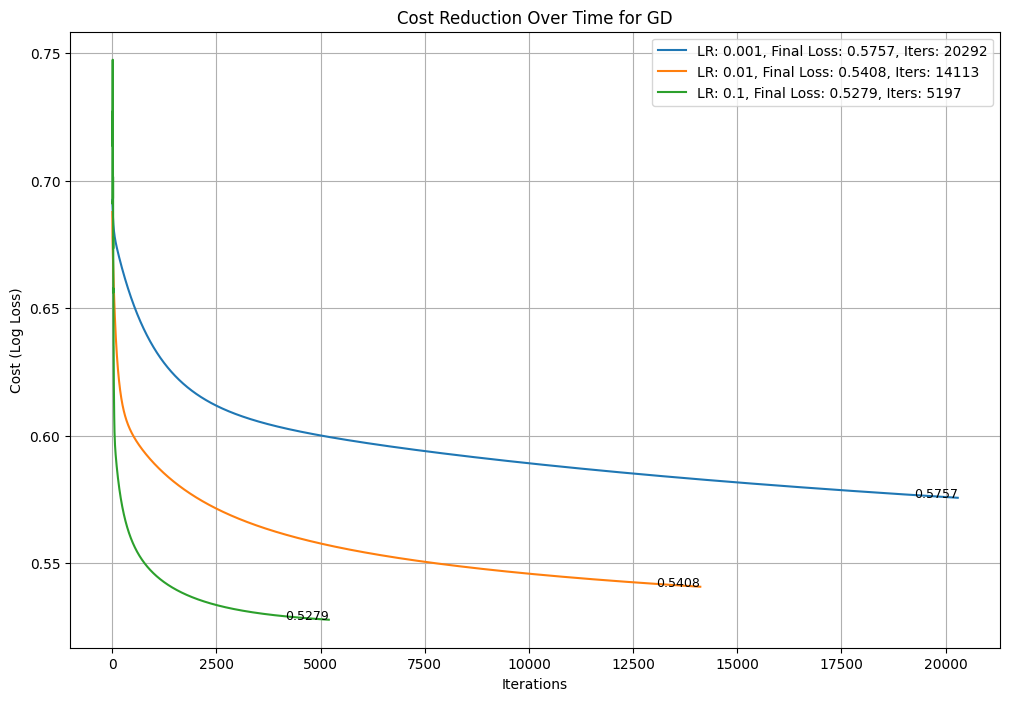

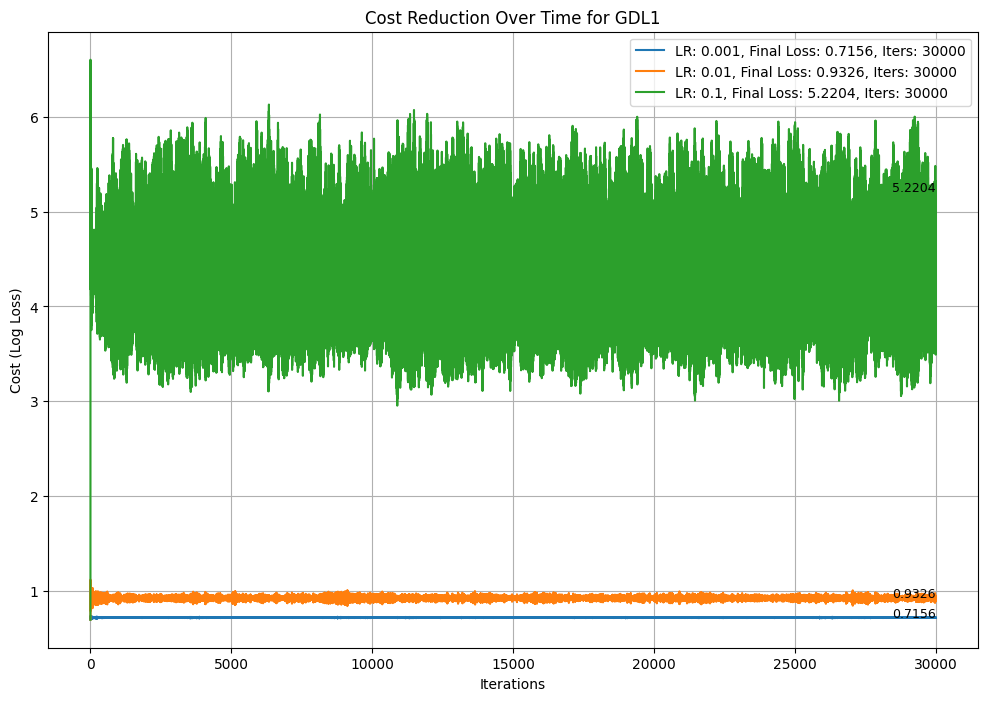

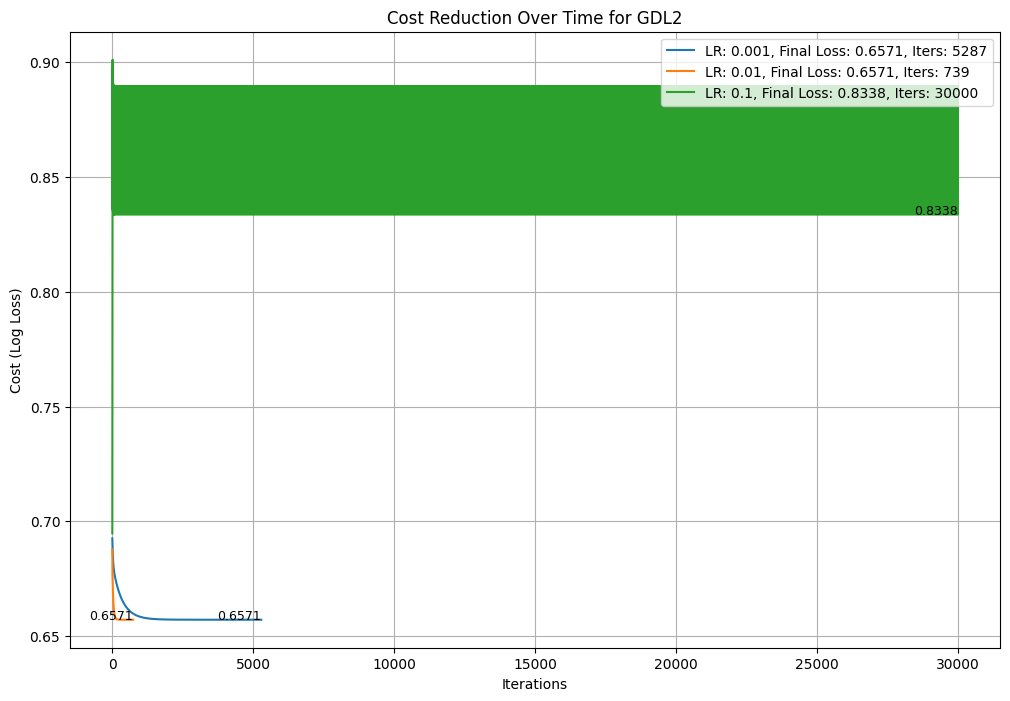

In [7]:
# Different learning rates to compare
learning_rates = [0.001, 0.01, 0.1]

# List of models to compare
models_to_compare = {
    "GD": LogisticRegressionGD,
    "GDL1": LogisticRegressionGDL1,
    "GDL2": LogisticRegressionGDL2,
    # "GD_backtracking": LogisticRegressionGDbacktracking,
    # "NAGD": LogisticRegressionNAGD,
    # "SGD_fixed_step": LogisticRegressionSGD_fixed_step,
    # "SGD_batch_size": LogisticRegressionSGD_batch_size,
    # "SGD_1k": LogisticRegressionSGD1k,
    # "SGD_1k_batch": LogisticRegressionSGD1k_mini_batch,
    # "SGD_1sqrtk": LogisticRegressionSGD1SqrtK,
    # "SGD_1sqrtk_batch": LogisticRegressionSGD1SqrtKBatch,
    # "NewtonPure": LogisticRegressionNewtonPure,
    # "NewtonFixedStep": LogisticRegressionNewtonFixedStep,
    # "NewtonBacktracking": LogisticRegressionNewtonBacktracking
}

# Train and plot for each model with different learning rates
for model_name, ModelClass in models_to_compare.items():
    models = []

    for lr in learning_rates:
        # Instantiate and configure the model
        if model_name == "GD":
            model = ModelClass(learning_rate=lr, max_iter=30000)
        elif model_name == "GDL1":
            model = ModelClass(learning_rate=lr, max_iter=30000, lambda_ = 1)
        elif model_name == "GDL2":
            model = ModelClass(learning_rate=lr, max_iter=30000, lambda_ = 1)
        # elif model_name == "GD_backtracking":
            # model = ModelClass(max_iter=1000, alpha=0.3, beta=0.8)
        # elif model_name == "NAGD":
        #     model = ModelClass(learning_rate=lr, max_iter=5000)
        # elif model_name == "SGD_fixed_step":
        #     model = ModelClass(learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_batch_size":
        #     model = ModelClass(learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1k":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1k_batch":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300, batch_size=100)
        # elif model_name == "SGD_1sqrtk":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1sqrtk_batch":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300, batch_size=100)
        # elif model_name == "NewtonPure":
        #     model = ModelClass(max_iter=100)
        # elif model_name == "NewtonFixedStep":
        #     model = ModelClass(max_iter=100)
        # elif model_name == "NewtonBacktracking":
        #     model = ModelClass(max_iter=100)

        # Train the model
        model.fit(X_train_processed, y_train)
        models.append(model)

    # Plot the cost reduction for the current model
    plot_cost_reduction_for_model(models, learning_rates, model_name)

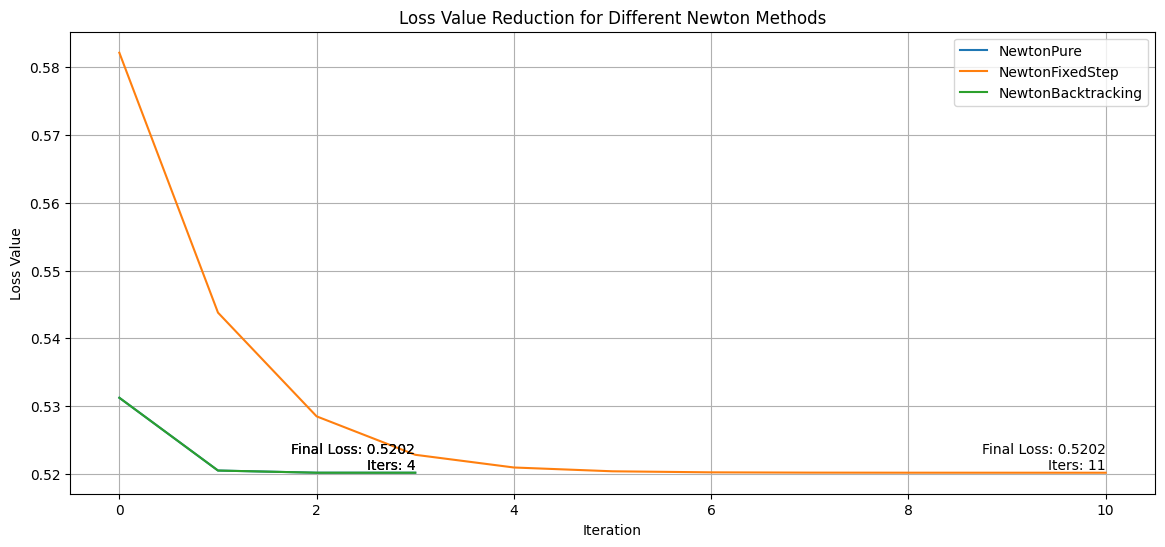

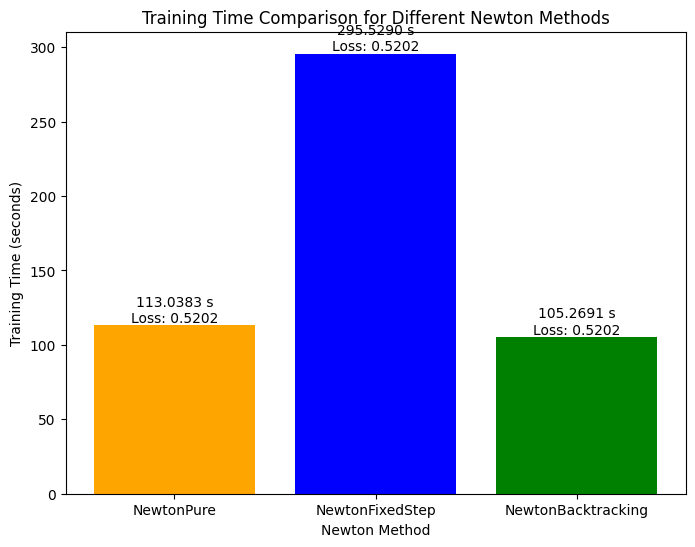

In [ ]:
import time
import matplotlib.pyplot as plt

# List of Newton methods to compare
newton_models_to_compare = {
    "NewtonPure": LogisticRegressionNewtonPure,
    "NewtonFixedStep": LogisticRegressionNewtonFixedStep,
    "NewtonBacktracking": LogisticRegressionNewtonBacktracking
}

# Lists to store losses and training times for each Newton method
losses_dict = {}
training_times_dict = {}
final_losses_dict = {}
iterations_dict = {}

# Loop through each Newton model
for model_name, ModelClass in newton_models_to_compare.items():
    model = ModelClass(max_iter=100)

    # Track time
    start_time = time.time()

    # Train the model and store the loss history
    model.fit(X_train_processed, y_train)
    training_time = time.time() - start_time

    # Get the loss reduction history
    loss_history = model.loss_history

    # Store the results
    losses_dict[model_name] = loss_history
    training_times_dict[model_name] = training_time
    final_losses_dict[model_name] = loss_history[-1]  # Final loss value
    iterations_dict[model_name] = len(loss_history)  # Number of iterations

# Plotting Loss Value Reduction
plt.figure(figsize=(14, 6))

for model_name, loss_history in losses_dict.items():
    plt.plot(range(len(loss_history)), loss_history, label=model_name)
    plt.text(len(loss_history) - 1, loss_history[-1], f'Final Loss: {loss_history[-1]:.4f}\nIters: {len(loss_history)}',
             verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title('Loss Value Reduction for Different Newton Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training Time Comparison
plt.figure(figsize=(8, 6))

bars = plt.bar(training_times_dict.keys(), training_times_dict.values(), color=['orange', 'blue', 'green'])

for bar, model_name in zip(bars, training_times_dict.keys()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{training_times_dict[model_name]:.4f} s\nLoss: {final_losses_dict[model_name]:.4f}',
             ha='center', va='bottom')

plt.xlabel('Newton Method')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison for Different Newton Methods')
plt.show()


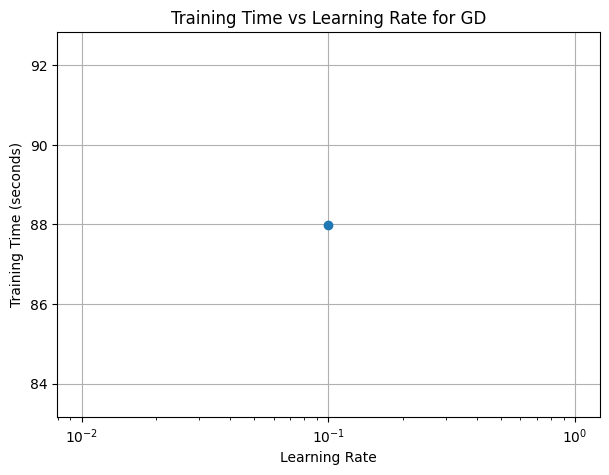

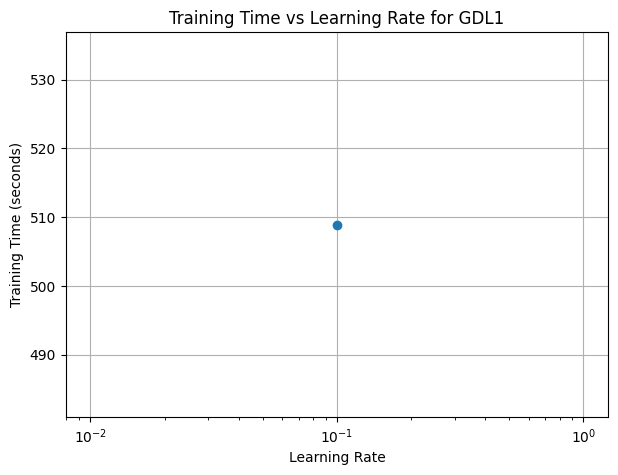

In [ ]:
import time
import matplotlib.pyplot as plt

# List to store the training times for each model
train_times_dict = {}

# Models to compare, with their unique parameters
models = {
    "GD": LogisticRegressionGD,
    "GDL1": LogisticRegressionGDL1,
    "GDL2": LogisticRegressionGDL2,
    # "GD_backtracking": LogisticRegressionGDbacktracking,
    # "NAGD": LogisticRegressionNAGD,
    # "SGD_fixed_step": LogisticRegressionSGD_fixed_step,
    # "SGD_batch_size": LogisticRegressionSGD_batch_size,
    # "SGD_1k": LogisticRegressionSGD1k,
    # "SGD_1k_batch": LogisticRegressionSGD1k_mini_batch,
    # "SGD_1sqrtk": LogisticRegressionSGD1SqrtK,
    # "SGD_1sqrtk_batch": LogisticRegressionSGD1SqrtKBatch,
    # "NewtonPure": LogisticRegressionNewtonPure,
    # "NewtonFixedStep": LogisticRegressionNewtonFixedStep,
    # "NewtonBacktracking": LogisticRegressionNewtonBacktracking
}

# Learning rates to compare for gradient-based methods
learning_rates = [0.1]

# Loop through each model
for model_name, model_class in models.items():
    train_times = []

    # Separate logic for Newton methods (which don't use learning rates)
    if "Newton" in model_name:
        model = model_class(max_iter=100)

        # Measure training time
        start_time = time.time()
        model.fit(X_train_processed, y_train)
        train_time = time.time() - start_time
        train_times.append(train_time)

        # Plotting the results for the Newton-based model
        plt.figure(figsize=(7, 5))
        plt.bar(["Newton Method"], train_times, color='orange')
        plt.xlabel('Model')
        plt.ylabel('Training Time (seconds)')
        plt.title(f'Training Time for {model_name}')
        plt.grid(True)
        plt.show()
    else:
        # For gradient-based methods, loop over learning rates
        for lr in learning_rates:
            if model_name == 'GD':
                model = model_class(learning_rate=lr, max_iter=30000)
            elif model_name == 'GDL1':
                model = model_class(learning_rate=lr, max_iter=30000, lambda_=1)
            elif model_name == 'GDL2':
                model = model_class(learning_rate=lr, max_iter=30000, lambda_=1)
            # elif model_name == 'GD_backtracking':
            #     model = model_class(max_iter=5000, alpha=0.3, beta=0.8)
            # elif model_name == 'NAGD':
            #     model = model_class(learning_rate=lr, max_iter=5000, momentum=0.9)
            # elif model_name == "SGD_fixed_step":
            #     model = model_class(learning_rate=lr, max_iter=300)
            # elif model_name == "SGD_batch_size":
            #     model = model_class(learning_rate=lr, max_iter=300)
            # elif model_name == "SGD_1k":
            #     model = model_class(initial_learning_rate=lr, max_iter=300)
            # elif model_name == "SGD_1k_batch":
            #     model = model_class(initial_learning_rate=lr, max_iter=300, batch_size=100)
            # elif model_name == "SGD_1sqrtk":
            #     model = model_class(initial_learning_rate=lr, max_iter=300)
            # elif model_name == "SGD_1sqrtk_batch":
            #     model = model_class(initial_learning_rate=lr, max_iter=300, batch_size=100)

            # Measure training time
            start_time = time.time()
            model.fit(X_train_processed, y_train)
            train_time = time.time() - start_time
            train_times.append(train_time)

        # Plotting the results for gradient-based models
        plt.figure(figsize=(7, 5))
        plt.plot(learning_rates, train_times, marker='o')
        plt.xlabel('Learning Rate')
        plt.ylabel('Training Time (seconds)')
        plt.title(f'Training Time vs Learning Rate for {model_name}')
        plt.xscale('log')  # Log scale to better visualize differences
        plt.grid(True)
        plt.show()


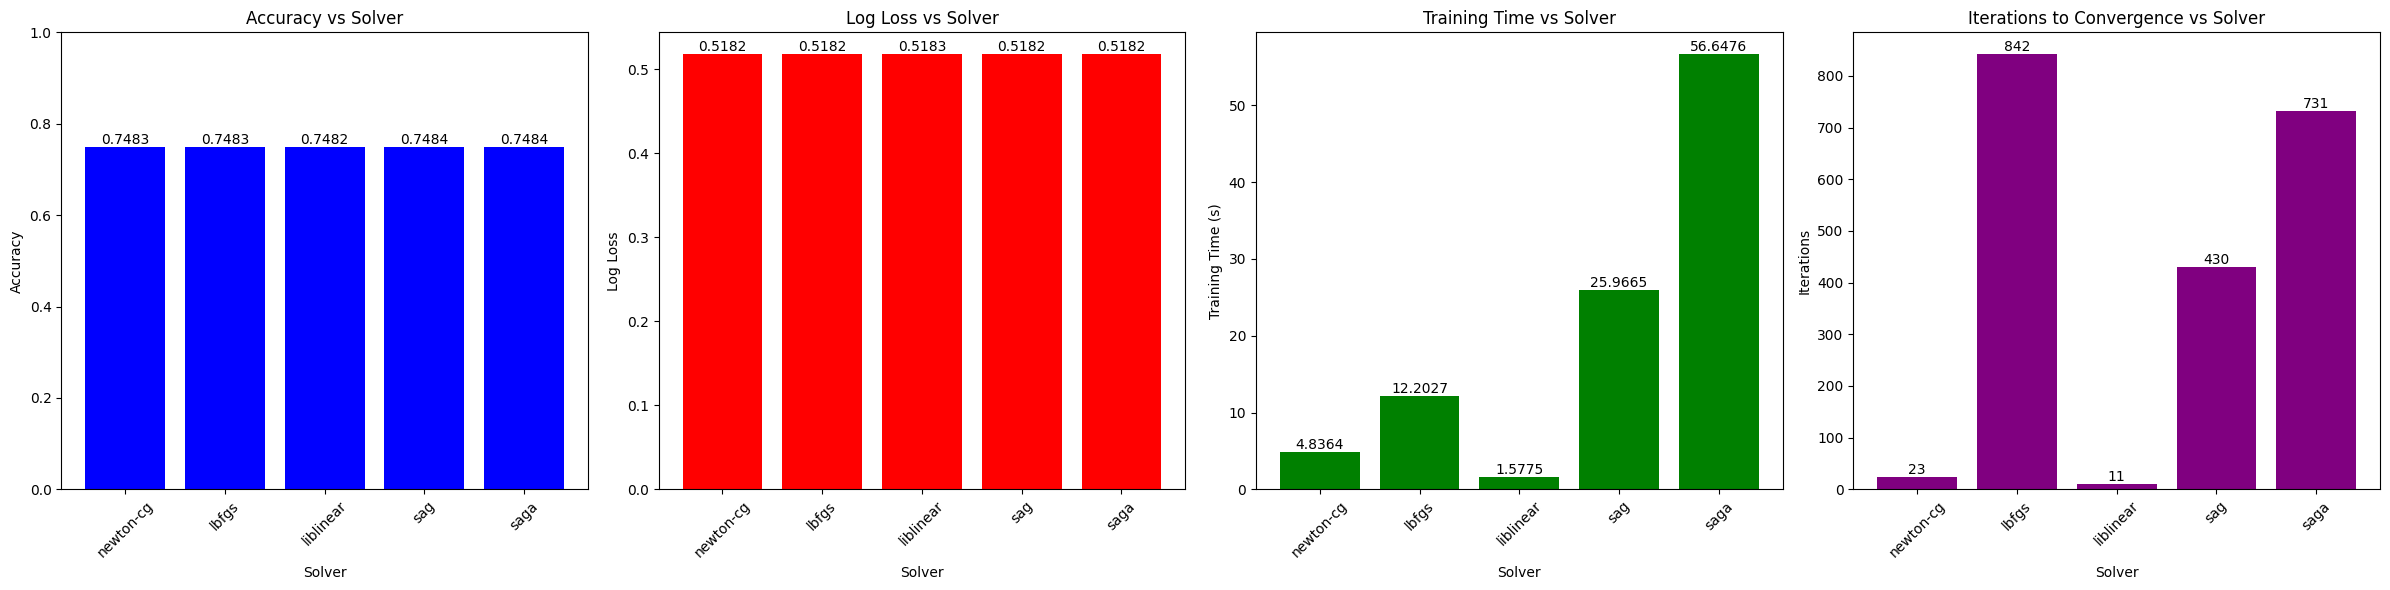

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Available solvers in scikit-learn's LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Dictionary to store results
results = {'Solver': [], 'Accuracy': [], 'Log Loss': [], 'Training Time (s)': [], 'Iterations': []}

# Loop through each solver
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=5000)

    # Start timing
    start_time = time.time()

    # Fit the model
    model.fit(X_train_processed, y_train)

    # Calculate training time
    train_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)

    # Calculate accuracy and log loss
    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)

    # Number of iterations until convergence
    if isinstance(model.n_iter_, (list, np.ndarray)):
        iters = model.n_iter_[0]  # Take the first element if it's an array
    else:
        iters = model.n_iter_

    # Store results
    results['Solver'].append(solver)
    results['Accuracy'].append(acc)
    results['Log Loss'].append(loss)
    results['Training Time (s)'].append(train_time)
    results['Iterations'].append(iters)

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(24, 6))

# Plotting Accuracy
plt.subplot(1, 4, 1)
bars = plt.bar(results_df['Solver'], results_df['Accuracy'], color='blue')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Solver')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.xticks(rotation=45)
for bar, acc in zip(bars, results_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.4f}', ha='center', va='bottom')

# Plotting Log Loss
plt.subplot(1, 4, 2)
bars = plt.bar(results_df['Solver'], results_df['Log Loss'], color='red')
plt.xlabel('Solver')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Solver')
plt.xticks(rotation=45)
for bar, loss in zip(bars, results_df['Log Loss']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{loss:.4f}', ha='center', va='bottom')

# Plotting Training Time
plt.subplot(1, 4, 3)
bars = plt.bar(results_df['Solver'], results_df['Training Time (s)'], color='green')
plt.xlabel('Solver')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs Solver')
plt.xticks(rotation=45)
for bar, time in zip(bars, results_df['Training Time (s)']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.4f}', ha='center', va='bottom')

# Plotting Iterations until Convergence
plt.subplot(1, 4, 4)
bars = plt.bar(results_df['Solver'], results_df['Iterations'], color='purple')
plt.xlabel('Solver')
plt.ylabel('Iterations')
plt.title('Iterations to Convergence vs Solver')
plt.xticks(rotation=45)
for bar, iters in zip(bars, results_df['Iterations']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{iters}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Initialize an empty list to store results
learning_rates = [0.001, 0.01, 0.1]
results = []

# Train and evaluate each model with different learning rates
for model_name, ModelClass in models_to_compare.items():
    for lr in learning_rates:
        # Instantiate and configure the model
        if model_name == "GD":
            model = ModelClass(learning_rate=lr, max_iter=30000)
        elif model_name == "GDL1":
            model = ModelClass(learning_rate=lr, max_iter=30000, lambda_=1)
        elif model_name == "GDL2":
            model = ModelClass(learning_rate=lr, max_iter=30000, lambda_=1)
        # elif model_name == "GD_backtracking":
            # model = ModelClass( max_iter=1000, alpha=0.3, beta=0.8)
        # elif model_name == "NAGD":
        #     model = ModelClass(learning_rate=lr, max_iter=5000)
        # elif model_name == "SGD_fixed_step":
        #     model = ModelClass(learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_batch_size":
        #     model = ModelClass(learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1k":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1k_batch":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300, batch_size=100)
        # elif model_name == "SGD_1sqrtk":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300)
        # elif model_name == "SGD_1sqrtk_batch":
        #     model = ModelClass(initial_learning_rate=lr, max_iter=300, batch_size=100)
        # elif model_name == "NewtonPure":
        #     model = ModelClass(max_iter=100)
        # elif model_name == "NewtonFixedStep":
        #     model = ModelClass(max_iter=100)
        # elif model_name == "NewtonBacktracking":
        #     model = ModelClass(max_iter=100)

        # Train the model
        model.fit(X_train_processed, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_processed)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Append the result to the results list
        results.append({
            'Model': model_name,
            'Learning Rate': lr,
            'Accuracy': accuracy
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


In [ ]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score

# Placeholder lists to store results
models = [
    ("LogisticRegressionGD", LogisticRegressionGD(learning_rate=0.1, max_iter=5000)),
    ("LogisticRegressionGDL1", LogisticRegressionGDL1(learning_rate=0.001, max_iter=5000)),
    ("LogisticRegressionGDL2", LogisticRegressionGDL2(learning_rate=0.01, max_iter=5000)),
    ("LogisticRegressionGDbacktracking", LogisticRegressionGDbacktracking(max_iter=5000, initial_learningrate=1)),
    ("LogisticRegressionNAGD", LogisticRegressionNAGD(learning_rate=0.01, max_iter=5000)),
    ("LogisticRegressionSGD_fixed_step", LogisticRegressionSGD_fixed_step(learning_rate=0.001, max_iter=300)),
    ("LogisticRegressionSGD_batch_size", LogisticRegressionSGD_batch_size(learning_rate=0.01, max_iter=300, batch_size=100)),
    ("LogisticRegressionSGD1k", LogisticRegressionSGD1k(initial_learning_rate=0.01, max_iter=300)),
    ("LogisticRegressionSGD1k_mini_batch", LogisticRegressionSGD1k_mini_batch(initial_learning_rate=0.1, max_iter=300, batch_size=100)),
    ("LogisticRegressionSGD1SqrtK", LogisticRegressionSGD1SqrtK(initial_learning_rate=0.01, max_iter=300)),
    ("LogisticRegressionSGD1SqrtKBatch", LogisticRegressionSGD1SqrtKBatch(initial_learning_rate=0.1, max_iter=300, batch_size=100)),
    ("LogisticRegressionNewtonPure", LogisticRegressionNewtonPure(max_iter=20)),
    ("LogisticRegressionNewtonFixedStep", LogisticRegressionNewtonFixedStep(max_iter=20)),
    ("LogisticRegressionNewtonBacktracking", LogisticRegressionNewtonBacktracking(max_iter=20))
]

# Placeholder to store results
train_times = []
losses = []
accuracies = []
iterations = []

# Loop through all models to compute training time, log loss, accuracy, and iterations
for model_name, model in models:
    start_time = time.time()
    model.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    proba = model.predict_proba(X_test_processed)
    predictions = model.predict(X_test_processed)

    # Use the loss history recorded during training
    final_loss = model.loss_history[-1] if model.loss_history else float('inf')
    accuracy = accuracy_score(y_test, predictions)

    # Extract the number of iterations
    if hasattr(model, 'n_iter_'):
        iters = model.n_iter_
    elif hasattr(model, 'iterations'):  # Assuming a custom attribute for iterations
        iters = model.iterations
    else:
        iters = 'N/A'

    train_times.append(train_time)
    losses.append(final_loss)
    accuracies.append(accuracy)
    iterations.append(iters)

# Creating a DataFrame to display results
results_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'Training Time (s)': train_times,
    'Final Log Loss': losses,
    'Accuracy': accuracies,
    'Iterations': iterations
})

# Sorting the DataFrame by Accuracy and Final Log Loss
results_df = results_df.sort_values(by=['Accuracy', 'Final Log Loss'], ascending=[False, True]).reset_index(drop=True)

# Display the DataFrame
results_df
